# Generate Performance Plot

## Import Packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

## Retrieve and Process Data

In [2]:
df = pd.read_html('https://github.com/TDAmeritrade/stumpy', match='STUMPED.256')[0]
df = df.rename(columns={'n = 2i': 'n'})
df['GPU-STOMP'] = pd.to_timedelta(df['GPU-STOMP'])
df['STUMP.2'] = pd.to_timedelta(df['STUMP.2'])
df['STUMP.16'] = pd.to_timedelta(df['STUMP.16'])
df['STUMPED.128'] = pd.to_timedelta(df['STUMPED.128'])
df['STUMPED.256'] = pd.to_timedelta(df['STUMPED.256'])
df['GPU-STUMP.1'] = pd.to_timedelta(df['GPU-STUMP.1'])
df['GPU-STUMP.2'] = pd.to_timedelta(df['GPU-STUMP.2'])
df['GPU-STUMP.DGX1'] = pd.to_timedelta(df['GPU-STUMP.DGX1'])
df['GPU-STUMP.DGX2'] = pd.to_timedelta(df['GPU-STUMP.DGX2'])

df.head()

,i,n,GPU-STOMP,STUMP.2,STUMP.16,STUMPED.128,STUMPED.256,GPU-STUMP.1,GPU-STUMP.2,GPU-STUMP.DGX1,GPU-STUMP.DGX2
0,6.0,64,00:00:10,00:00:00,00:00:00,00:00:05.770000,00:00:06.080000,00:00:00.030000,00:00:01.630000,NaT,NaT
1,7.0,128,00:00:10,00:00:00,00:00:00,00:00:05.930000,00:00:07.290000,00:00:00.040000,00:00:01.660000,NaT,NaT
2,8.0,256,00:00:10,00:00:00,00:00:00.010000,00:00:05.950000,00:00:07.590000,00:00:00.080000,00:00:01.690000,00:00:06.680000,00:00:25.680000
3,9.0,512,00:00:10,00:00:00,00:00:00.020000,00:00:05.970000,00:00:07.470000,00:00:00.130000,00:00:01.660000,00:00:06.590000,00:00:27.660000
4,10.0,1024,00:00:10,00:00:00.020000,00:00:00.040000,00:00:05.690000,00:00:07.640000,00:00:00.240000,00:00:01.720000,00:00:06.700000,00:00:30.490000


In [3]:
dfs = {
    'GPU-STOMP': df[['n', 'GPU-STOMP']],
    'STUMP.2': df[['n', 'STUMP.2']],    
    'STUMP.16': df[['n', 'STUMP.16']],
    'STUMPED.128': df[['n', 'STUMPED.128']],
    'STUMPED.256': df[['n', 'STUMPED.256']],
    'GPU-STUMP.1': df[['n', 'GPU-STUMP.1']],
    'GPU-STUMP.2': df[['n', 'GPU-STUMP.2']],
    'GPU-STUMP.DGX1': df[['n', 'GPU-STUMP.DGX1']],
    'GPU-STUMP.DGX2': df[['n', 'GPU-STUMP.DGX2']],
}

line_dashes = {
    'GPU-STOMP': 'solid',
    'STUMP.2': '20 20',    
    'STUMP.16': '16 16',
    'STUMPED.128': '12 12',
    'STUMPED.256': '8 8',
    'GPU-STUMP.1': '16 16',
    'GPU-STUMP.2': 'solid',
    'GPU-STUMP.DGX1': '12 12',
    'GPU-STUMP.DGX2': 'solid',
     #‘^(\d+(\s+\d+)*)?$’
}

for k in dfs.keys():
    dfs[k] = dfs[k].dropna()

## Plot Performance Results

Text(100000000, 4, 'Lower is "Better"')

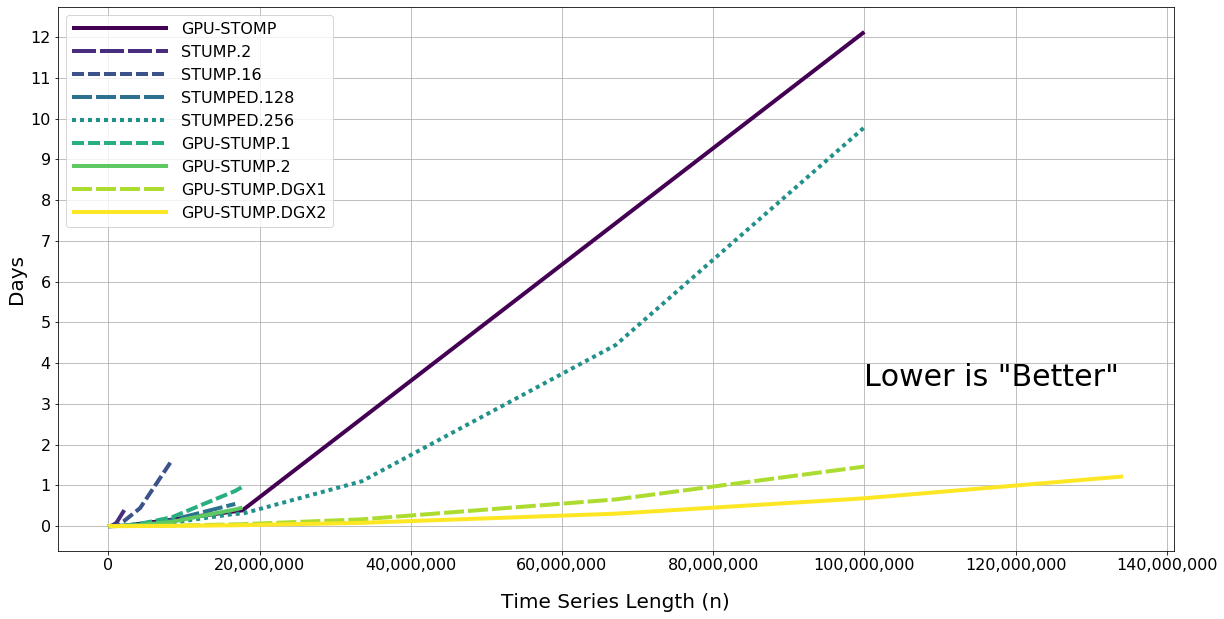

In [4]:
space = 1
line_dashes = {
    'GPU-STOMP': (1, 0),
    'STUMP.2': (6, space, 6, space),    
    'STUMP.16': (3, space, 3, space),
    'STUMPED.128': (5, space, 5, space),
    'STUMPED.256': (1, space, 1, space),
    'GPU-STUMP.1': (3, space, 3, space),
    'GPU-STUMP.2': (1, 0),
    'GPU-STUMP.DGX1': (5, space, 5, space),
    'GPU-STUMP.DGX2': (1, 0),
}

viridis = cm.get_cmap('viridis', len(dfs.keys()))

fig, ax = plt.subplots(figsize=[20, 10])
ax.set_yticks(range(13), minor=False)
ax.grid()
ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Time Series Length (n)', fontsize=20, labelpad=20)
plt.ylabel('Days', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

for i, k in enumerate(dfs.keys()):
    ax.plot(dfs[k].iloc[:, 0], 
            dfs[k].iloc[:, 1]/pd.Timedelta('1 days'), 
            linewidth=4,
            dashes=line_dashes[k],
            c=viridis(i),
            label=k,
           )

ax.legend(loc="upper left", handlelength=6, fontsize=16)
ax.text(100000000,
        4, 
        'Lower is "Better"', 
        fontsize=30,
        verticalalignment='top',
       )

In [5]:
fig.savefig("performance.png", dpi=200, bbox_inches='tight', pad_inches=0.1,)